## program 03

**PCA for reducing demensionality**

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [21]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
df['species'] = pd.Series(iris.target).map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [29]:
print(df['species'].unique())

['setosa' 'versicolor' 'virginica']


In [33]:
Scaler = StandardScaler()
X_Scaled = Scaler.fit_transform(X)

In [37]:
cov_matrix = np.cov(X_Scaled.T)
print(cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


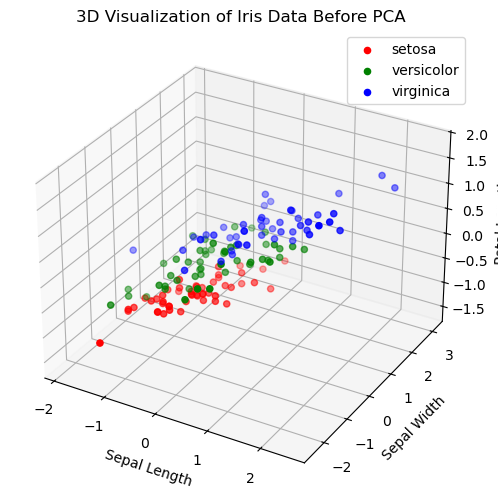

In [41]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']
labels = iris.target_names
for i in range(len(colors)):
    ax.scatter(X_Scaled[y == i, 0], X_Scaled[y == i, 1], X_Scaled[y == i, 2], color=colors[i], label=labels[i])  # Fixed missing 'label' argument
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Visualization of Iris Data Before PCA')
plt.legend()
plt.show()

In [45]:
U, S, Vt = np.linalg.svd(X_Scaled, full_matrices=False)
print("Singular Values:", S)

Singular Values: [20.92306556 11.7091661   4.69185798  1.76273239]


In [51]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_Scaled)

In [53]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.2f}")

Explained Variance by PC1: 0.73
Explained Variance by PC2: 0.23


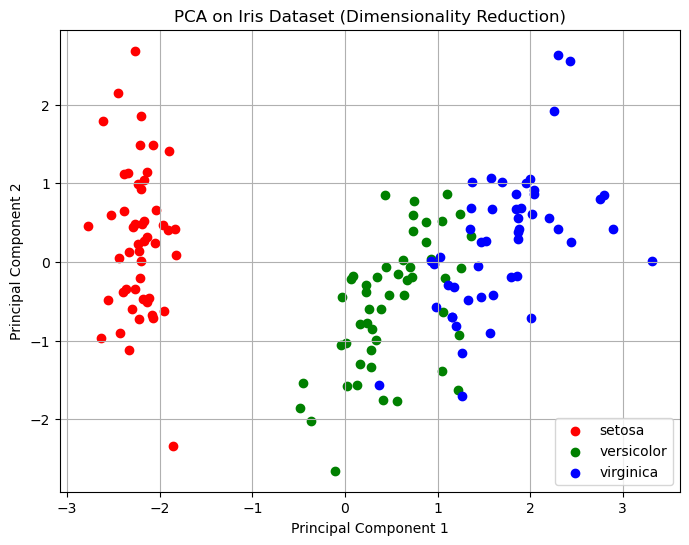

In [55]:
# Step 8: Visualizing the Transformed Data

plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=labels[i])  # Fixed missing 'label' argument
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset (Dimensionality Reduction)')
plt.legend()
plt.grid()
plt.show()

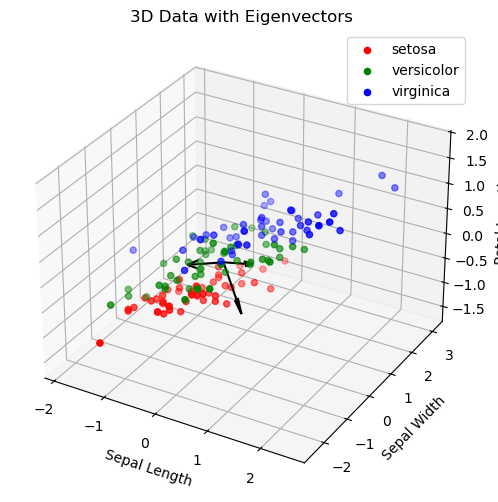

In [59]:
# Step 9: Visualizing Eigenvectors Superimposed on 3D Data

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(colors)):
    ax.scatter(X_Scaled[y == i, 0], X_Scaled[y == i, 1], X_Scaled[y == i, 2], color=colors[i], label=labels[i])  # Fixed missing 'label' argument
for i in range(3):  # Plot first three eigenvectors
    ax.quiver(0, 0, 0, eigenvectors[i, 0], eigenvectors[i, 1], eigenvectors[i, 2], length=1, color='black')  # Added length and color for clarity
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Data with Eigenvectors')
plt.legend()
plt.show()

# ANOTHER WAY OF DOING THIS IN EASY WAY

In [64]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Step 1: Load the Iris dataset
iris = load_iris()
features = iris.data  # The 4 features: Sepal Length, Sepal Width, Petal Length, Petal Width
target = iris.target  # The target class (species)

In [68]:
# Step 2: Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [70]:
# Step 3: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

In [72]:
# Step 4: Create a DataFrame for the reduced data
pca_df = pd.DataFrame(data=features_pca, columns=["Principal Component 1", "Principal Component 2"])
pca_df["Target"] = target

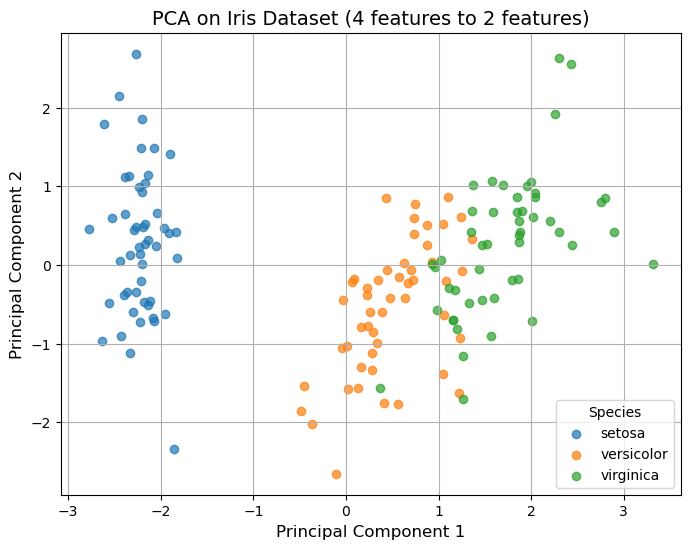

In [74]:
# Step 5: Visualize the results
plt.figure(figsize=(8, 6))
for label, color in zip(iris.target_names, ["red", "green", "blue"]):
    plt.scatter(
        pca_df.loc[pca_df["Target"] == list(iris.target_names).index(label), "Principal Component 1"],
        pca_df.loc[pca_df["Target"] == list(iris.target_names).index(label), "Principal Component 2"],
        label=label,
        alpha=0.7
    )

plt.title("PCA on Iris Dataset (4 features to 2 features)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Species")
plt.grid()
plt.show()



In [76]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each Principal Component:")
print("Principal Component 1: ",explained_variance[0])
print("Principal Component 2: ",explained_variance[1])
print("Total Variance Retained: ",sum(explained_variance))

Explained Variance by each Principal Component:
Principal Component 1:  0.7296244541329986
Principal Component 2:  0.22850761786701776
Total Variance Retained:  0.9581320720000164


##### This demonstrates that 96% of the variance in the original dataset is retained in the reduced 2-dimensional dataset.